In [39]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('day_head_circumference.csv', dtype="float")
y_train = train.pop('head circumference')
x_train = torch.tensor(train.to_numpy(), dtype=torch.float)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float).reshape(-1, 1)

In [47]:
class NonLinearRegressionModel:
	
	def __init__(self):
		# requires_grad enables calculation of gradients
		self.W = torch.tensor([[0.0]], requires_grad=True)
		self.b = torch.tensor([[0.0]], requires_grad=True)

	# Predictor
	def f(self, x):
		return 20 * torch.sigmoid((x @ self.W + self.b)) + 31

	# Uses Mean Squared Error
	def loss(self, x, y):
			return torch.nn.functional.mse_loss(self.f(x), y)	

	def parameters(self):
		return [self.W, self.b]

In [50]:
model = NonLinearRegressionModel()

optimizer = torch.optim.SGD([model.W,model.b], 1e-6)
for epoch in range(100_000):
    model.loss(x_train, y_train).backward() 
    optimizer.step() 

    optimizer.zero_grad()  

W = tensor([[0.0025]], requires_grad=True), b = tensor([[-0.1177]], requires_grad=True), loss = tensor(2.6798, grad_fn=<MseLossBackward>)


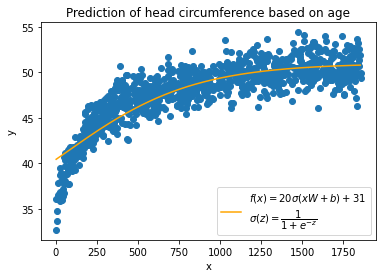

In [52]:
print("W = %s, b = %s, loss = %s" %(model.W, model.b, model.loss(x_train, y_train)))

plt.figure('Nonlinear regression 2d')
plt.title('Prediction of head circumference based on age')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, y_train)
x = torch.arange(torch.min(x_train), torch.max(x_train), 1.0).reshape(-1, 1)
y = model.f(x).detach()
plt.plot(x, y, color='orange',
         label='$f(x) = 20\sigma(xW + b) + 31$ \n$\sigma(z) = \dfrac{1}{1+e^{-z}}$')

plt.legend()
plt.show()